In [1]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import time
from matplotlib import pyplot

In [2]:
data = read_csv('train.csv')
dataset = data.values

In [3]:
X = dataset[:,0:94]
y = dataset[:,94]

In [4]:
label_encoded_y = LabelEncoder().fit_transform(y)

1 84.64505290985107
2 45.24035024642944
3 31.189123392105103
4 28.333575963974


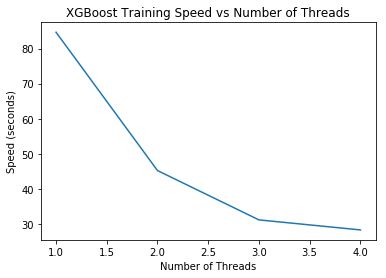

In [5]:
results = []
num_threads = [1, 2, 3, 4]
for n in num_threads:
	start = time.time()
	model = XGBClassifier(nthread=n)
	model.fit(X, label_encoded_y)
	elapsed = time.time() - start
	print(n, elapsed)
	results.append(elapsed)

pyplot.plot(num_threads, results)
pyplot.ylabel('Speed (seconds)')
pyplot.xlabel('Number of Threads')
pyplot.title('XGBoost Training Speed vs Number of Threads')
pyplot.show()